In [284]:
import requests #The requests module allows you to send HTTP requests using Python.
import time

from bs4 import BeautifulSoup

#allows us to parse the html. 
#It creates a parse tree for documents that can be used to extract data from HTML, which is useful for web scraping.

In [285]:
standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [286]:
data = requests.get(standings_url)
data

<Response [200]>

In [287]:
soup = BeautifulSoup(data.text)

In [234]:
standings_table = soup.select('table.stats_table')[0] #css selector to select table with class name stats_table

In [235]:
standings_table

<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2023-202491_overall"> <caption>Regular season Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Mat

In [236]:
links = standings_table.find_all('a') 
#in the standings table there is a link to every teams' results (the link is in the <a> tag)

In [237]:
links = [l.get('href') for l in links]

In [238]:
links = [l for l in links if '/squads/' in l]  #only want the links with /squads/ in it

In [239]:
links

['/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/18bb7c10/Arsenal-Stats',
 '/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/8602292d/Aston-Villa-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/b2b47a98/Newcastle-United-Stats',
 '/en/squads/19538871/Manchester-United-Stats',
 '/en/squads/7c21e445/West-Ham-United-Stats',
 '/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 '/en/squads/4ba7cbea/Bournemouth-Stats',
 '/en/squads/47c64c55/Crystal-Palace-Stats',
 '/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 '/en/squads/fd962109/Fulham-Stats',
 '/en/squads/d3fd31cc/Everton-Stats',
 '/en/squads/cd051869/Brentford-Stats',
 '/en/squads/e4a775cb/Nottingham-Forest-Stats',
 '/en/squads/e297cd13/Luton-Town-Stats',
 '/en/squads/943e8050/Burnley-Stats',
 '/en/squads/1df6b87e/Sheffield-United-Stats']

In [240]:
team_urls = [f"https://fbref.com{l}" for l in links] #create list of all the teams urls/links

In [241]:
team_urls

['https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats',
 'https://fbref.com/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/s

In [242]:
team_url = team_urls[0] # link to first team
team_url

'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats'

In [243]:
data = requests.get(team_url) # use requests to get link to first team's page 

In [244]:
import pandas as pd

matches = pd.read_html(team_url, match="Scores & Fixtures")[0]

In [245]:
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (1),1 (4),Arsenal,NaN,NaN,55.0,81145.0,Kyle Walker,4-2-3-1,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,0.3,65.0,21572.0,Kevin De Bruyne,4-2-3-1,Craig Pawson,Match Report,NaN
2,2023-08-16,22:00,Super Cup,UEFA Super Cup,Wed,Home,D,1 (5),1 (4),es Sevilla,NaN,NaN,74.0,NaN,Kyle Walker,4-2-3-1,François Letexier,Match Report,NaN
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,1.0,0.3,59.0,53419.0,Kyle Walker,4-2-3-1,Robert Jones,Match Report,NaN
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,3.5,0.7,79.0,31336.0,Kyle Walker,4-2-3-1,Jarred Gillett,Match Report,NaN
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,2.2,1.4,68.0,52899.0,Kyle Walker,4-2-3-1,Michael Oliver,Match Report,NaN
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,3.6,0.9,68.0,62475.0,Kyle Walker,4-2-3-1,Andy Madley,Match Report,NaN
7,2023-09-19,20:00,Champions Lg,Group stage,Tue,Home,W,3,1,rs Red Star,4.1,0.8,76.0,50204.0,Kyle Walker,4-2-3-1,João Pinheiro,Match Report,NaN
8,2023-09-23,15:00,Premier League,Matchweek 6,Sat,Home,W,2,0,Nott'ham Forest,1.3,1.0,57.0,53413.0,Kyle Walker,4-2-3-1,Anthony Taylor,Match Report,NaN
9,2023-09-27,20:00,EFL Cup,Third round,Wed,Away,L,0,1,Newcastle Utd,NaN,NaN,67.0,51692.0,Nathan Aké,3-2-4-1,Chris Kavanagh,Match Report,NaN


In [246]:
soup = BeautifulSoup(data.text)

In [247]:
links = soup.find_all('a')

In [248]:
links = [l.get('href') for l in links]

In [249]:
links = [l for l in links if l and 'all_comps/shooting/' in l] #get link to shooting stats for team 

In [250]:
links

['/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions']

In [251]:
link = f"https://fbref.com{links[0]}"
link

'https://fbref.com/en/squads/b8fd03ef/2023-2024/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions'

In [252]:
data = requests.get(link)

In [259]:
shooting = pd.read_html(link, match="Shooting")[0]

In [260]:
shooting =shooting[:-1]

In [261]:
shooting

For Manchester City                                                     \
                  Date   Time              Comp                Round  Day   
0           2023-08-06  16:00  Community Shield  FA Community Shield  Sun   
1           2023-08-11  20:00    Premier League          Matchweek 1  Fri   
2           2023-08-16  22:00         Super Cup       UEFA Super Cup  Wed   
3           2023-08-19  20:00    Premier League          Matchweek 2  Sat   
4           2023-08-27  14:00    Premier League          Matchweek 3  Sun   
5           2023-09-02  15:00    Premier League          Matchweek 4  Sat   
6           2023-09-16  15:00    Premier League          Matchweek 5  Sat   
7           2023-09-19  20:00      Champions Lg          Group stage  Tue   
8           2023-09-23  15:00    Premier League          Matchweek 6  Sat   
9           2023-09-27  20:00           EFL Cup          Third round  Wed   
10          2023-09-30  15:00    Premier League          Matchweek 7  Sat   
11          2023-10-04  21:00      Champions Lg          Group stage  Wed   
12          2023-10-08  16:30    Premier League          Matchweek 8  Sun   
13          2023-10-21  15:00    Premier League          Matchweek 9  Sat   
14          2023-10-25  21:00      Champions Lg          Group stage  Wed   
15          2023-10-29  15:30    Premier League         Matchweek 10  Sun   
16          2023-11-04  15:00    Premier League         Matchweek 11  Sat   
17          2023-11-07  20:00      Champions Lg          Group stage  Tue   
18          2023-11-12  16:30    Premier League         Matchweek 12  Sun   
19          2023-11-25  12:30    Premier League         Matchweek 13  Sat   
20          2023-11-28  20:00      Champions Lg          Group stage  Tue   
21          2023-12-03  16:30    Premier League         Matchweek 14  Sun   
22          2023-12-06  20:15    Premier League         Matchweek 15  Wed   
23          2023-12-10  14:00    Premier League         Matchweek 16  Sun   
24          2023-12-13  18:45      Champions Lg          Group stage  Wed   
25          2023-12-16  15:00    Premier League         Matchweek 17  Sat   
26          2023-12-27  20:15    Premier League         Matchweek 19  Wed   
27          2023-12-30  15:00    Premier League         Matchweek 20  Sat   
28          2024-01-07  14:00            FA Cup   Third round proper  Sun   
29          2024-01-13  17:30    Premier League         Matchweek 21  Sat   
30          2024-01-26  20:00            FA Cup  Fourth round proper  Fri   
31          2024-01-31  19:30    Premier League         Matchweek 22  Wed   
32          2024-02-05  20:00    Premier League         Matchweek 23  Mon   
33          2024-02-10  12:30    Premier League         Matchweek 24  Sat   
34          2024-02-13  21:00      Champions Lg          Round of 16  Tue   
35          2024-02-17  17:30    Premier League         Matchweek 25  Sat   
36          2024-02-20  19:30    Premier League         Matchweek 18  Tue   
37          2024-02-24  17:30    Premier League         Matchweek 26  Sat   
38          2024-02-27  20:00            FA Cup   Fifth round proper  Tue   
39          2024-03-03  15:30    Premier League         Matchweek 27  Sun   
40          2024-03-06  20:00      Champions Lg          Round of 16  Wed   
41          2024-03-10  15:45    Premier League         Matchweek 28  Sun   
42          2024-03-16  17:30            FA Cup       Quarter-finals  Sat   
43          2024-03-31  16:30    Premier League         Matchweek 30  Sun   
44          2024-04-03  20:15    Premier League         Matchweek 31  Wed   
45          2024-04-06  12:30    Premier League         Matchweek 32  Sat   
46          2024-04-09  21:00      Champions Lg       Quarter-finals  Tue   
47          2024-04-13  15:00    Premier League         Matchweek 33  Sat   
48          2024-04-17  20:00      Champions Lg       Quarter-finals  Wed   
49          2024-04-20  17:15            FA Cup          Semi-finals  Sat   

In [262]:
#we have a multi level index above, which is not useful. We will make a single lvel index
shooting.columns = shooting.columns.droplevel()

In [263]:
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (1),1 (4),Arsenal,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,13.9,0.0,0,0,1.9,1.9,0.12,1.1,1.1,Match Report
2,2023-08-16,22:00,Super Cup,UEFA Super Cup,Wed,Home,D,1 (5),1 (4),es Sevilla,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,17.9,0.0,0,0,1.0,1.0,0.07,0.0,0.0,Match Report
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,17.3,2.0,0,1,3.5,2.8,0.10,-1.5,-0.8,Match Report


In [264]:
#we now have two dataframes: matches and shooting. We want to merge these into one df called team_data
team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date", how='outer')


In [272]:
team_data

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2021-08-14,17:30,Premier League,Matchweek 1,Sat,Home,L,0,3,Liverpool,...,Match Report,NaN,14,3,17.1,0.0,0,0,2022,NorwichCity
1,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Away,L,0,5,Manchester City,...,Match Report,NaN,1,0,16.8,0.0,0,0,2022,NorwichCity
3,2021-08-28,15:00,Premier League,Matchweek 3,Sat,Home,L,1,2,Leicester City,...,Match Report,NaN,13,3,22.6,1.0,1,1,2022,NorwichCity
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,L,0,1,Arsenal,...,Match Report,NaN,10,1,19.9,1.0,0,0,2022,NorwichCity
5,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,L,1,3,Watford,...,Match Report,NaN,12,5,20.7,1.0,0,0,2022,NorwichCity
7,2021-09-25,15:00,Premier League,Matchweek 6,Sat,Away,L,0,2,Everton,...,Match Report,NaN,10,2,22.3,1.0,0,0,2022,NorwichCity
8,2021-10-02,15:00,Premier League,Matchweek 7,Sat,Away,D,0,0,Burnley,...,Match Report,NaN,10,2,20.7,2.0,0,0,2022,NorwichCity
9,2021-10-16,15:00,Premier League,Matchweek 8,Sat,Home,D,0,0,Brighton,...,Match Report,NaN,15,2,21.7,1.0,0,0,2022,NorwichCity
10,2021-10-23,12:30,Premier League,Matchweek 9,Sat,Away,L,0,7,Chelsea,...,Match Report,NaN,3,1,20.8,0.0,0,0,2022,NorwichCity
11,2021-10-31,14:00,Premier League,Matchweek 10,Sun,Home,L,1,2,Leeds United,...,Match Report,NaN,14,3,21.8,3.0,0,0,2022,NorwichCity


['Liverpool', 'Manchester City', 'Leicester City', 'Arsenal', 'Watford', 'Everton', 'Burnley', 'Brighton', 'Chelsea', 'Leeds United', 'Brentford', 'Southampton', 'Wolves', 'Newcastle Utd', 'Tottenham', 'Manchester Utd', 'Aston Villa', 'Arsenal', 'Crystal Palace', 'West Ham', 'Everton', 'Watford', 'Crystal Palace', 'Manchester City', 'Liverpool', 'Southampton', 'Brentford', 'Chelsea', 'Leeds United', 'Brighton', 'Burnley', 'Manchester Utd', 'Newcastle Utd', 'Aston Villa', 'West Ham', 'Leicester City', 'Wolves', 'Tottenham']


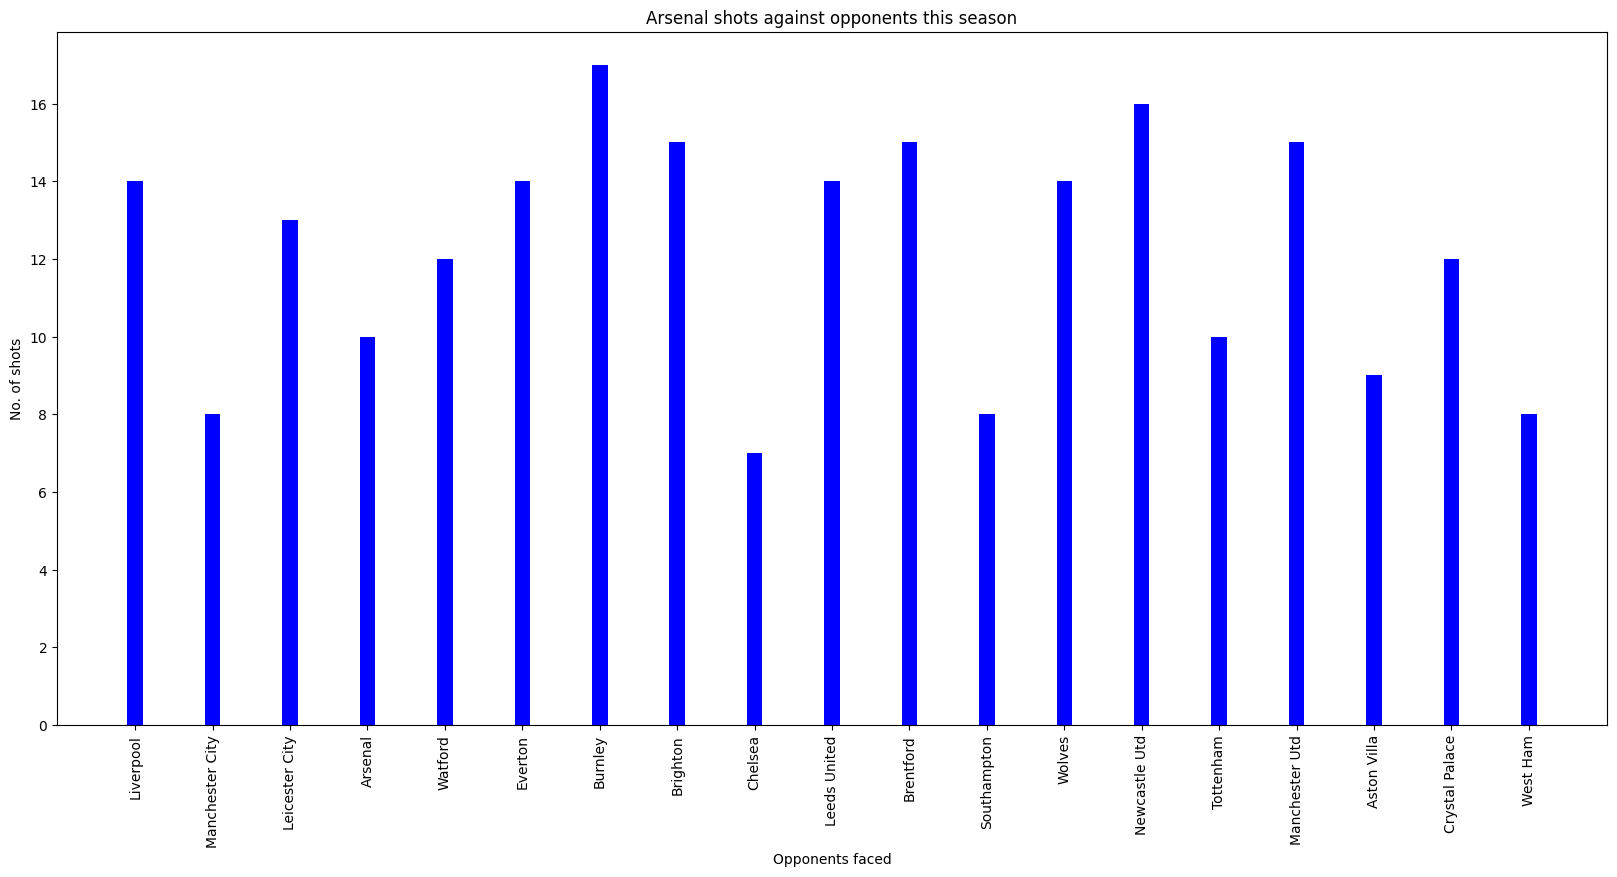

In [273]:
import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
opponents = list(team_data["Opponent"])
print(opponents)
shots = list(team_data["Sh"].values)
  
fig = plt.figure(figsize = (20,9))
 
# creating the bar plot
plt.bar(opponents, shots, color ='blue', 
        width = 0.2)
 
plt.xlabel("Opponents faced")
plt.xticks(rotation=90)
plt.ylabel("No. of shots")
plt.title("Arsenal shots against opponents this season")
plt.show()

In [288]:
#lets scale this method up!
#get the data for multiple teams for multiple seasons, not just one team for one season..
#get the data for the last 3 seasons
years = list(range(2024, 2021, -1))

In [289]:
years

[2024, 2023, 2022]

In [290]:
all_matches = []

In [291]:
standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [292]:
for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text)
    standings_table = soup.select('table.stats_table')[0] #css selector to select table with class name stats_table

    links = [l.get('href') for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]  #only want the links with /squads/ in it
    team_urls = [f"https://fbref.com{l}" for l in links] #create list of all the teams urls/links

    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com/{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", "")

        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]

        soup = BeautifulSoup(data.text)
        links = [l.get('href') for l in soup.find_all("a")]
        links = [l for l in links if l and 'all_comps/shooting/' in l] #get link to shooting stats for team 
        link = f"https://fbref.com{links[0]}"
        data = requests.get(link)
        shooting = pd.read_html(data.text, match="Shooting")[0]
        shooting = shooting[:-1]
        shooting.columns = shooting.columns.droplevel()

        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date", how='outer')
        except ValueError:
            continue

        team_data = team_data[team_data["Comp"] == "Premier League"]
        team_data["Season"] = year #adding season column
        team_data["Team"] = team_name #adding team collumn
        all_matches.append(team_data)
        time.sleep(1)

C:\Users\tomas.hehir\AppData\Local\Temp\ipykernel_19032\3322026561.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
C:\Users\tomas.hehir\AppData\Local\Temp\ipykernel_19032\3322026561.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]
C:\Users\tomas.hehir\AppData\Local\Temp\ipykernel_19032\3322026561.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
C:\Users\tomas.hehir\AppData\Local\Temp\ipykernel_19032\3322026561.py:24: FutureW

In [293]:
all_matches

[          Date   Time            Comp         Round  Day Venue Result GF GA  \
 1   2023-08-11  20:00  Premier League   Matchweek 1  Fri  Away      W  3  0   
 3   2023-08-19  20:00  Premier League   Matchweek 2  Sat  Home      W  1  0   
 4   2023-08-27  14:00  Premier League   Matchweek 3  Sun  Away      W  2  1   
 5   2023-09-02  15:00  Premier League   Matchweek 4  Sat  Home      W  5  1   
 6   2023-09-16  15:00  Premier League   Matchweek 5  Sat  Away      W  3  1   
 8   2023-09-23  15:00  Premier League   Matchweek 6  Sat  Home      W  2  0   
 10  2023-09-30  15:00  Premier League   Matchweek 7  Sat  Away      L  1  2   
 12  2023-10-08  16:30  Premier League   Matchweek 8  Sun  Away      L  0  1   
 13  2023-10-21  15:00  Premier League   Matchweek 9  Sat  Home      W  2  1   
 15  2023-10-29  15:30  Premier League  Matchweek 10  Sun  Away      W  3  0   
 16  2023-11-04  15:00  Premier League  Matchweek 11  Sat  Home      W  6  1   
 18  2023-11-12  16:30  Premier League  

In [294]:
match_df = pd.concat(all_matches)

In [295]:
match_df = match_df.drop(["Match Report", "Notes"], axis=1)
match_df.columns = [c.lower() for c in match_df.columns]

In [296]:
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,4-2-3-1,Craig Pawson,17.0,8.0,13.9,0.0,0.0,0.0,2024,ManchesterCity
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,4-2-3-1,Robert Jones,14.0,4.0,17.9,0.0,0.0,0.0,2024,ManchesterCity
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,4-2-3-1,Jarred Gillett,29.0,9.0,17.3,2.0,0.0,1.0,2024,ManchesterCity
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,4-2-3-1,Michael Oliver,6.0,4.0,14.8,0.0,1.0,1.0,2024,ManchesterCity
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,4-2-3-1,Andy Madley,29.0,13.0,16.4,1.0,0.0,0.0,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0,2,Aston Villa,...,4-2-3-1,John Brooks,9.0,3.0,21.6,0.0,0.0,0.0,2022,NorwichCity
39,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0,4,West Ham,...,4-2-3-1,Robert Jones,8.0,2.0,22.2,1.0,0.0,0.0,2022,NorwichCity
40,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0,3,Leicester City,...,4-1-4-1,Simon Hooper,9.0,5.0,17.0,0.0,0.0,0.0,2022,NorwichCity
41,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1,1,Wolves,...,3-4-3,Tony Harrington,11.0,2.0,14.4,0.0,0.0,0.0,2022,NorwichCity


In [297]:
match_df.to_csv("matches.csv")

In [ ]:
#match_df = match_df[(match_df['team'] == "Arsenal")]
#match_df